# Python 金融資料的處理應用

> 實作：簡單向量化回測

[郭耀仁](https://hahow.in/@tonykuoyj?tr=tonykuoyj) | yaojenkuo@ntu.edu.tw | April 2024

In [1]:
from my_finance_module import get_yfinance_data
from datetime import datetime
import pandas as pd
from talib import abstract

## 簡單移動平均線

## 關於簡單移動平均線

- Simple Moving Average, SMA
- 代表過去一段時間裡的平均成交價格，簡單移動平均線最主要目的是用來判斷趨勢。

In [2]:
start_date_str = "2023-10-01"
stop_date_str = "2024-04-08"
tsmc = get_yfinance_data("2330", start_date_str, stop_date_str, True)
df = pd.DataFrame()
df["close"] = tsmc["chart"]["result"][0]["indicators"]["quote"][0]["close"]
df.index = [datetime.fromtimestamp(ts).date() for ts in tsmc["chart"]["result"][0]["timestamp"]]
df

Request status code: 200


,close
2023-10-02,533.0
2023-10-03,529.0
2023-10-04,520.0
2023-10-05,528.0
2023-10-06,532.0
...,...
2024-03-29,776.0
2024-04-01,770.0
2024-04-02,790.0
2024-04-03,780.0


## 如何計算簡單移動平均價格

- 使用 `rolling()` 方法依照日期移動價格。
- 使用 `mean()` 方法計算平均價格。

In [3]:
df_5 = df.rolling(5, min_periods=1).mean()   # 五日簡單移動平均價格
df_20 = df.rolling(20, min_periods=1).mean() # 二十日簡單移動平均價格
df_60 = df.rolling(60, min_periods=1).mean() # 六十日簡單移動平均價格

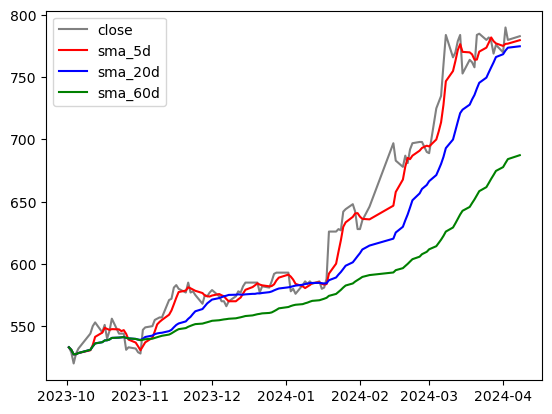

In [4]:
ax = df.plot(color="grey")
df_5.plot(ax=ax, color="red")
df_20.plot(ax=ax, color="blue")
df_60.plot(ax=ax, color="green")
ax.legend(["close", "sma_5d", "sma_20d", "sma_60d"])

## 依據簡單移動平均線制定進場、出場策略

- 當五日簡單移動平均價格大於收盤價且沒有庫存時買入。
- 當五日簡單移動平均價格小於收盤價且有庫存時賣出。

In [5]:
stock_inventory = 0
profit = 0
trade_history = []
for trade_date, row_i, row_j in zip(df.index, df["close"].values, df_5["close"].values):
    if pd.isnull(row_j):
        continue
    if row_j > row_i and stock_inventory == 0:
        stock_inventory = 1
        price = row_i
        trade_history.append((trade_date.strftime("%Y-%m-%d"), "Buy", price))
    elif row_j < row_i and stock_inventory == 1:
        stock_inventory = 0
        price = row_i
        last_price = trade_history[-1][2]
        current_profit = price - last_price
        profit += current_profit
        trade_history.append((trade_date.strftime("%Y-%m-%d"), "Sell", price))
trade_times = len(trade_history)
print(f"trade times: {trade_times}, profit: {profit}")
print(trade_history)

trade times: 30, profit: 154.0
[('2023-10-03', 'Buy', 529.0), ('2023-10-05', 'Sell', 528.0), ('2023-10-18', 'Buy', 540.0), ('2023-10-20', 'Sell', 556.0), ('2023-10-23', 'Buy', 544.0), ('2023-11-02', 'Sell', 547.0), ('2023-11-20', 'Buy', 577.0), ('2023-11-21', 'Sell', 585.0), ('2023-11-22', 'Buy', 577.0), ('2023-11-28', 'Sell', 575.0), ('2023-12-04', 'Buy', 574.0), ('2023-12-11', 'Sell', 574.0), ('2023-12-21', 'Buy', 577.0), ('2023-12-26', 'Sell', 586.0), ('2024-01-03', 'Buy', 578.0), ('2024-01-08', 'Sell', 583.0), ('2024-01-12', 'Buy', 584.0), ('2024-01-15', 'Sell', 586.0), ('2024-01-16', 'Buy', 580.0), ('2024-01-18', 'Sell', 588.0), ('2024-01-31', 'Buy', 628.0), ('2024-02-05', 'Sell', 646.0), ('2024-02-21', 'Buy', 681.0), ('2024-02-22', 'Sell', 692.0), ('2024-02-29', 'Buy', 690.0), ('2024-03-04', 'Sell', 725.0), ('2024-03-15', 'Buy', 753.0), ('2024-03-21', 'Sell', 784.0), ('2024-03-27', 'Buy', 779.0), ('2024-04-02', 'Sell', 790.0)]


## 平滑異同移動平均線

## 關於平滑異同移動平均線

- Moving Average Convergence and Divergence, MACD
- 利用快線與慢線兩者的走勢與兩者相減所得的差值來判斷股價走勢。
- 可以視為指數移動平均線（EMA）的進階應用。

## 安裝 `talib` 模組

- 啟動環境 `conda activate pythonfinance`
- 先安裝 TA-Lib 軟體。
    - Windows: 下載 [ta-lib-0.4.0-msvc.zip](https://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-msvc.zip) 並在 `C:\ta-lib` 解壓縮。
    - macOS: `brew install ta-lib`
- 再使用 `pip install talib` 指令安裝模組。

## 如何計算平滑異同移動平均線

- MACD 的計算複雜，透過 `talib` 模組協助即可。
- 載入 `talib` 模組中的 `abstract` 物件。
- 使用 `MACD()` 方法獲得快線（macd）、慢線（macdsignal）與差值（macdhist）。

In [6]:
abstract.MACD(df)

,macd,macdsignal,macdhist
2023-10-02,NaN,NaN,NaN
2023-10-03,NaN,NaN,NaN
2023-10-04,NaN,NaN,NaN
2023-10-05,NaN,NaN,NaN
2023-10-06,NaN,NaN,NaN
...,...,...,...
2024-03-29,23.950431,28.076898,-4.126467
2024-04-01,22.145810,26.890680,-4.744870
2024-04-02,22.075001,25.927544,-3.852544
2024-04-03,20.970235,24.936082,-3.965847


<Axes: >

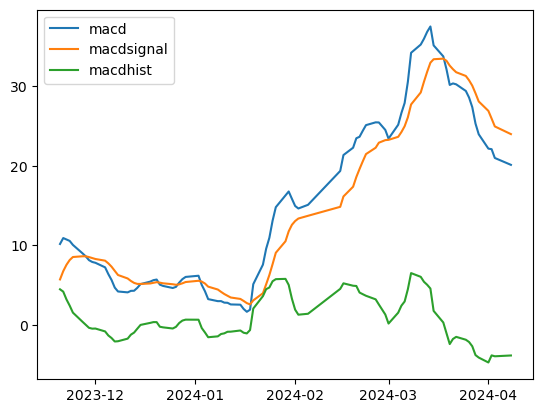

In [7]:
abstract.MACD(df).plot()

## 依據平滑異同移動平均線制定進場、出場策略

- 當快線穿過慢線且沒有庫存時買入。
- 當慢線穿過快線且有庫存時賣出。

In [8]:
stock_inventory = 0
profit = 0
trade_history = []
macd_df = abstract.MACD(df)
for trade_date, row in macd_df.iterrows():
    if pd.isnull(row["macd"]):
        continue
    if row["macd"] > row["macdsignal"] and stock_inventory == 0:
        stock_inventory = 1
        price = df.loc[trade_date, "close"]
        trade_history.append((trade_date.strftime("%Y-%m-%d"), "Buy", price))
    elif row["macd"] < row["macdsignal"] and stock_inventory == 1:
        stock_inventory = 0
        price = df.loc[trade_date, "close"]
        last_price = trade_history[-1][2]
        current_profit = price - last_price
        profit += current_profit
        trade_history.append((trade_date.strftime("%Y-%m-%d"), "Sell", price))
trade_times = len(trade_history)
print(f"trade times: {trade_times}, profit: {profit}")
print(trade_history)

trade times: 8, profit: 112.0
[('2023-11-20', 'Buy', 577.0), ('2023-11-28', 'Sell', 575.0), ('2023-12-18', 'Buy', 585.0), ('2023-12-21', 'Sell', 577.0), ('2023-12-27', 'Buy', 592.0), ('2024-01-03', 'Sell', 578.0), ('2024-01-19', 'Buy', 626.0), ('2024-03-19', 'Sell', 762.0)]


## 相對強弱指標

## 關於相對強弱指標

- Relative Strength Index, RSI
- 用來評估股市中「買賣雙方力道的強弱」，衡量股價上漲和下跌的天數以及幅度，來判斷股價是否有超買或超賣的狀況。

## 如何計算相對強弱指標

- 相對強弱指標的計算複雜，透過 `talib` 模組協助即可。
- 載入 `talib` 模組中的 `abstract` 物件。
- 使用 `RSI()` 方法獲得相對強弱指標。

In [9]:
abstract.RSI(df)

2023-10-02          NaN
2023-10-03          NaN
2023-10-04          NaN
2023-10-05          NaN
2023-10-06          NaN
                ...    
2024-03-29    63.062163
2024-04-01    60.065230
2024-04-02    65.885127
2024-04-03    61.091138
2024-04-08    61.984799
Length: 123, dtype: float64

<Axes: >

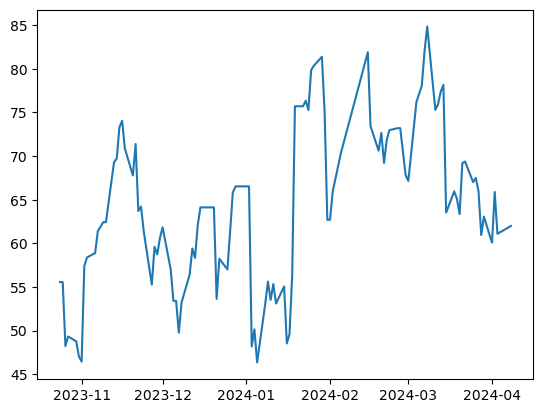

In [10]:
abstract.RSI(df).plot()

## 依據相對強弱指標制定進場、出場策略

- 當相對強弱指標未滿 50 且沒有庫存時買入。
- 當相對強弱指標超過 70 且有庫存時賣出。

In [11]:
stock_inventory = 0
profit = 0
trade_history = []
rsi_series = abstract.RSI(df)
for trade_date, rsi_value in zip(rsi_series.index, rsi_series.values):
    if pd.isnull(rsi_value):
        continue
    if rsi_value < 50 and stock_inventory == 0:
        stock_inventory = 1
        price = df.loc[trade_date, "close"]
        trade_history.append((trade_date.strftime("%Y-%m-%d"), "Buy", price))
    elif rsi_value > 70 and stock_inventory == 1:
        stock_inventory = 0
        price = df.loc[trade_date, "close"]
        last_price = trade_history[-1][2]
        current_profit = price - last_price
        profit += current_profit
        trade_history.append((trade_date.strftime("%Y-%m-%d"), "Sell", price))
trade_times = len(trade_history)
print(f"trade times: {trade_times}, profit: {profit}")
print(trade_history)

trade times: 4, profit: 110.0
[('2023-10-26', 'Buy', 531.0), ('2023-11-15', 'Sell', 581.0), ('2023-12-07', 'Buy', 566.0), ('2024-01-19', 'Sell', 626.0)]


## 隨機指標

## 關於隨機指標

- Stochastic Oscillator
- 由 K 和 D 兩個值組成，使用隨機指標的投資人會用這兩個值來判斷目前價格相對過去一段時間的高低變化。
- 相對強弱指標與隨機指標都是技術分析中的動量分析（Momentum analysis）方法。
    - 相對強弱指標呈現「一段時間內股價買盤與賣盤力量強弱比例」。
    - 隨機指標呈現「最新股價的相對高低位置」。

## 如何計算隨機指標

- 隨機指標的計算複雜，透過 `talib` 模組協助即可。
- 載入 `talib` 模組中的 `abstract` 物件。
- 使用 `STOCH()` 方法獲得隨機指標。
- 提供的 `DataFrame` 必須要有 OHLC 四個價格。

In [12]:
df = pd.DataFrame()
for p in ["open", "high", "low", "close"]:
    df[p] = tsmc["chart"]["result"][0]["indicators"]["quote"][0][p]
df.index = [datetime.fromtimestamp(ts).date() for ts in tsmc["chart"]["result"][0]["timestamp"]]
df

,open,high,low,close
2023-10-02,530.0,534.0,528.0,533.0
2023-10-03,528.0,533.0,528.0,529.0
2023-10-04,521.0,523.0,519.0,520.0
2023-10-05,523.0,529.0,523.0,528.0
2023-10-06,530.0,533.0,529.0,532.0
...,...,...,...,...
2024-03-29,769.0,777.0,768.0,776.0
2024-04-01,783.0,783.0,769.0,770.0
2024-04-02,784.0,790.0,783.0,790.0
2024-04-03,783.0,785.0,778.0,780.0


In [13]:
abstract.STOCH(df)

,slowk,slowd
2023-10-02,NaN,NaN
2023-10-03,NaN,NaN
2023-10-04,NaN,NaN
2023-10-05,NaN,NaN
2023-10-06,NaN,NaN
...,...,...
2024-03-29,24.166667,41.371371
2024-04-01,15.277778,25.833333
2024-04-02,47.222222,28.888889
2024-04-03,54.292929,38.930976


<Axes: >

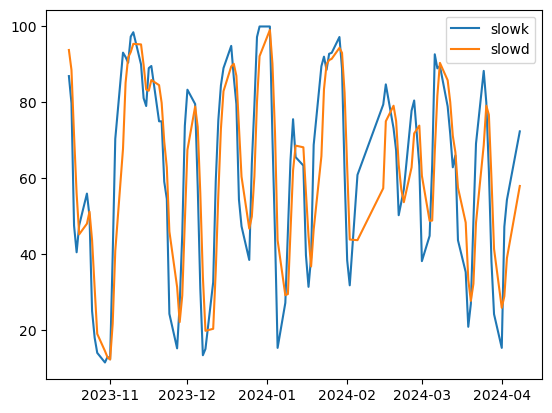

In [14]:
abstract.STOCH(df).plot()

## 依據隨機指標制定進場、出場策略

- 當 K 值大於 D 值且沒有庫存時買入。
- 當 K 值小於 D 值且有庫存時賣出。

In [15]:
stock_inventory = 0
profit = 0
trade_history = []
stoch_df = abstract.STOCH(df)
for trade_date, row in stoch_df.iterrows():
    if pd.isnull(row["slowk"]):
        continue
    if row["slowk"] > row["slowd"] and stock_inventory == 0:
        stock_inventory = 1
        price = df.loc[trade_date, "close"]
        trade_history.append((trade_date.strftime("%Y-%m-%d"), "Buy", price))
    elif row["slowk"] < row["slowd"] and stock_inventory == 1:
        stock_inventory = 0
        price = df.loc[trade_date, "close"]
        last_price = trade_history[-1][2]
        current_profit = price - last_price
        profit += current_profit
        trade_history.append((trade_date.strftime("%Y-%m-%d"), "Sell", price))
trade_times = len(trade_history)
print(f"trade times: {trade_times}, profit: {profit}")
print(trade_history)

trade times: 29, profit: 132.0
[('2023-10-20', 'Buy', 556.0), ('2023-10-24', 'Sell', 544.0), ('2023-10-31', 'Buy', 529.0), ('2023-11-08', 'Sell', 556.0), ('2023-11-09', 'Buy', 557.0), ('2023-11-13', 'Sell', 571.0), ('2023-11-16', 'Buy', 583.0), ('2023-11-20', 'Sell', 577.0), ('2023-11-28', 'Buy', 575.0), ('2023-12-05', 'Sell', 570.0), ('2023-12-11', 'Buy', 574.0), ('2023-12-19', 'Sell', 585.0), ('2023-12-26', 'Buy', 586.0), ('2024-01-03', 'Sell', 578.0), ('2024-01-09', 'Buy', 586.0), ('2024-01-12', 'Sell', 584.0), ('2024-01-18', 'Buy', 588.0), ('2024-01-24', 'Sell', 627.0), ('2024-01-25', 'Buy', 642.0), ('2024-01-30', 'Sell', 642.0), ('2024-02-05', 'Buy', 646.0), ('2024-02-19', 'Sell', 678.0), ('2024-02-23', 'Buy', 697.0), ('2024-02-29', 'Sell', 690.0), ('2024-03-05', 'Buy', 730.0), ('2024-03-08', 'Sell', 784.0), ('2024-03-21', 'Buy', 784.0), ('2024-03-27', 'Sell', 779.0), ('2024-04-02', 'Buy', 790.0)]


## 依據隨機指標制定進場、出場策略

- 當 K 值大於 D 值，兩個值都小於 40 且沒有庫存時買入。
- 當 K 值小於 D 值，兩個值都大於 60 且有庫存時賣出。

In [16]:
stock_inventory = 0
profit = 0
trade_history = []
stoch_df = abstract.STOCH(df)
for trade_date, row in stoch_df.iterrows():
    if pd.isnull(row["slowk"]):
        continue
    if row["slowk"] > row["slowd"] and stock_inventory == 0 and (row["slowk"] < 40 and row["slowd"] < 40):
        stock_inventory = 1
        price = df.loc[trade_date, "close"]
        trade_history.append((trade_date.strftime("%Y-%m-%d"), "Buy", price))
    elif row["slowk"] < row["slowd"] and stock_inventory == 1 and (row["slowk"] > 60 and row["slowd"] > 60):
        stock_inventory = 0
        price = df.loc[trade_date, "close"]
        last_price = trade_history[-1][2]
        current_profit = price - last_price
        profit += current_profit
        trade_history.append((trade_date.strftime("%Y-%m-%d"), "Sell", price))
trade_times = len(trade_history)
print(f"trade times: {trade_times}, profit: {profit}")
print(trade_history)

trade times: 6, profit: 76.0
[('2023-10-31', 'Buy', 529.0), ('2023-11-08', 'Sell', 556.0), ('2023-11-28', 'Buy', 575.0), ('2023-12-19', 'Sell', 585.0), ('2024-01-18', 'Buy', 588.0), ('2024-01-24', 'Sell', 627.0)]
